In [16]:
import warnings
warnings.filterwarnings('ignore')

import os

PROJ_ROOT = os.pardir

TRAIN_DATA = os.path.join(PROJ_ROOT, "data", "raw", "train.csv")
TEST_DATA = os.path.join(PROJ_ROOT, "data", "raw", "test.csv")

import sys
sys.path.append(os.path.join(PROJ_ROOT, "src"))

%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [17]:
from pandas_summary import DataFrameSummary
from IPython.display import display

In [18]:
PATH = os.path.join(PROJ_ROOT, "data", "raw/")

PATH


from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd
from pandas_summary import DataFrameSummary
import seaborn as sns
from itertools import combinations
import matplotlib.pyplot as plt
import math

In [19]:
from features.build_features import remove_outliers, feature_engineering_create_ratios, row_augmentation

In [20]:
train_df = pd.read_csv(f"{PATH}/bodyfat-train.csv")
test_df = pd.read_csv(f"{PATH}/bodyfat-test.csv")

## Structure
1. Data exploration
2. Feature Engineering
3. Train Test Split
4. Model evaluation and metrics
5. Ensembling
6. Results.


### Data Exploration

In [21]:
dfs = DataFrameSummary(train_df)

AttributeError: module 'pandas.core.common' has no attribute 'is_numeric_dtype'

In [22]:
dfs.columns_types

NameError: name 'dfs' is not defined

In [23]:
dfs.columns_stats

NameError: name 'dfs' is not defined

In [24]:
dfs["Body fat (%)"]

NameError: name 'dfs' is not defined

In [25]:
target = train_df["Body fat (%)"]

In [26]:
def create_ratio(df, col1, col2):
    col_name = f"{col1}_{col2}_ratio"
    df[col_name] = df[col1]/df[col2]
    return col_name

def feature_engineering_create_ratios(df):
    """Do not pass target in the df. It will be scaled."""
    columns = list(df.columns)
    ratio_list = combinations(columns, 2)
    ret = df.copy()
    for col1, col2 in ratio_list:
        create_ratio(ret, col1, col2)
    return ret

#### Find outliers.
We need to scatter plot all the columns to find outliers. Below cell does that.

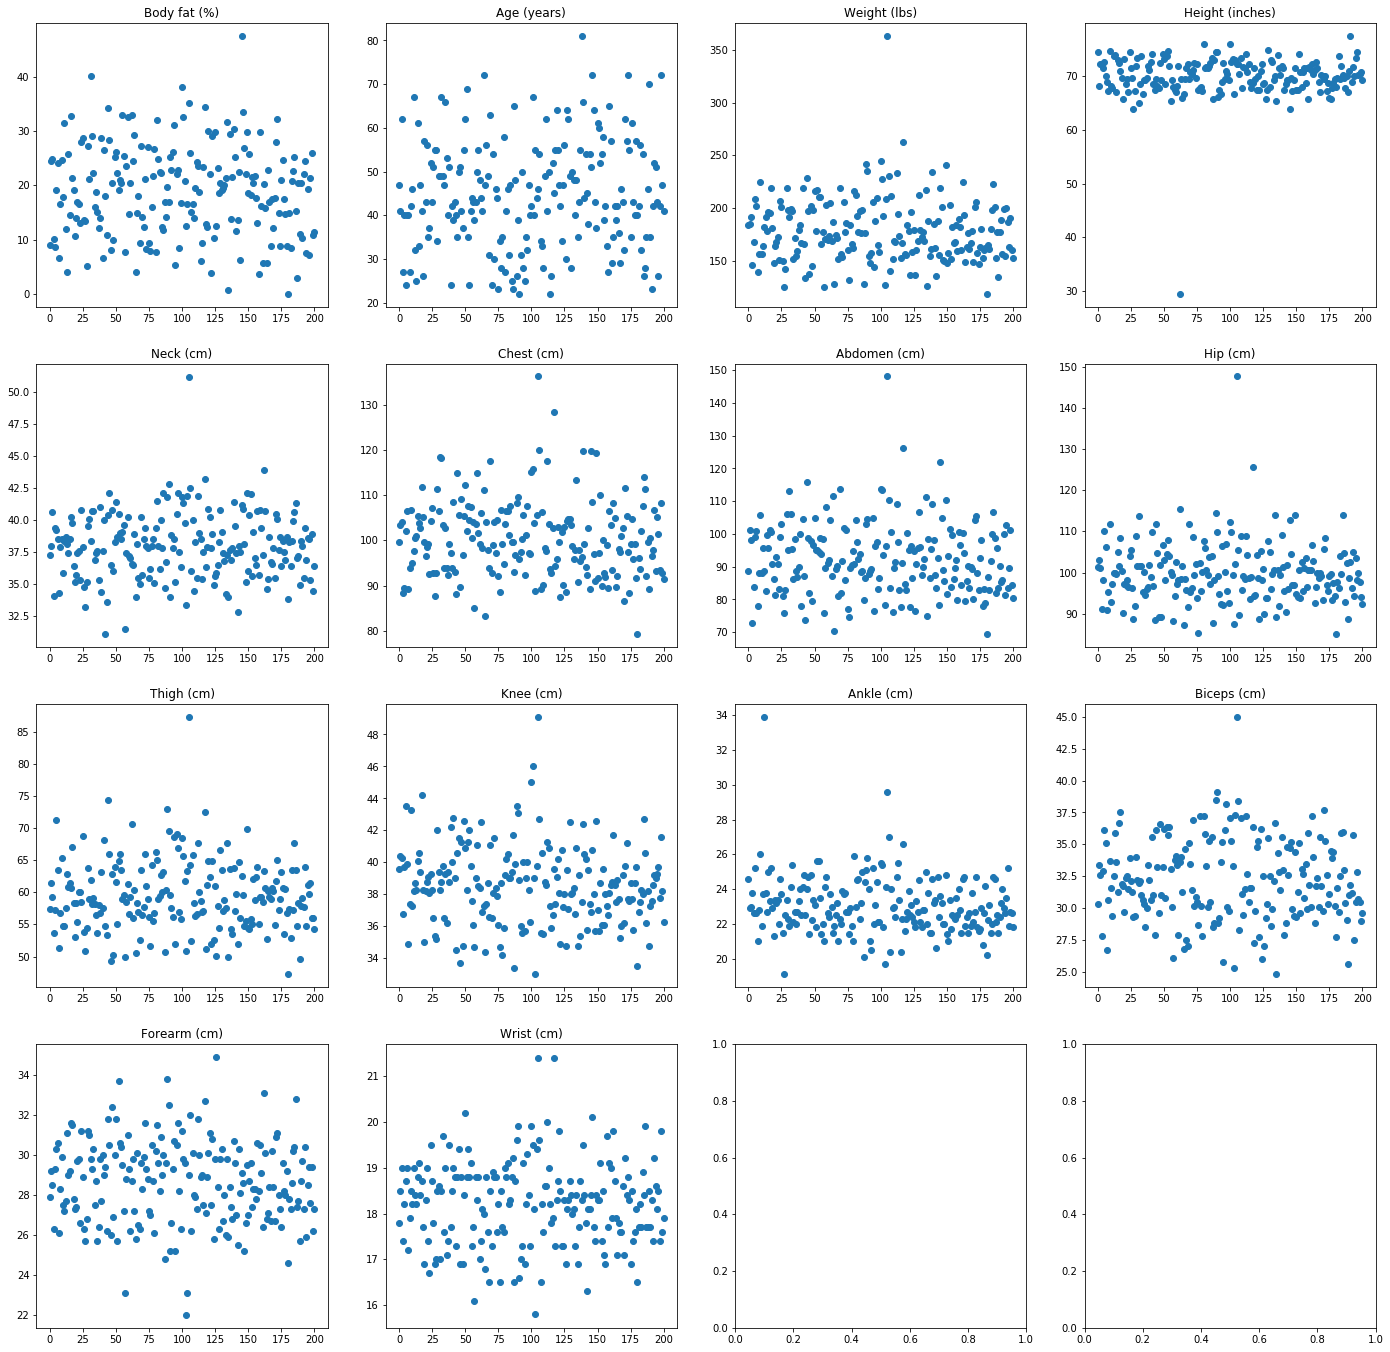

In [27]:
cols = list(train_df.columns)
n = math.ceil(math.sqrt(len(cols)))
columns=n
rows=n
fig, ax_array = plt.subplots(rows, columns, squeeze=False)
fig.set_size_inches(24, 24)
for i, ax_row in enumerate(ax_array):
    for j, axes in enumerate(ax_row):
        if rows * i + j < len(cols):
            col = cols[rows * i + j]
            axes.set_title(col)
            axes.scatter(list((range(201))), train_df[col])
plt.show()

#### Remove outliers
We can easily eyeball outliers in the above graph. Now we can cleanit using statistics



In [28]:
data_mean, data_std = train_df.mean(), train_df.std(); data_mean, data_std

(Body fat (%)        18.977612
 Age (years)         44.631841
 Weight (lbs)       178.370398
 Height (inches)     70.009950
 Neck (cm)           37.992537
 Chest (cm)         100.500000
 Abdomen (cm)        92.392537
 Hip (cm)            99.885572
 Thigh (cm)          59.407960
 Knee (cm)           38.574627
 Ankle (cm)          23.060697
 Biceps (cm)         32.197015
 Forearm (cm)        28.645771
 Wrist (cm)          18.216418
 dtype: float64, Body fat (%)        8.391314
 Age (years)        12.462896
 Weight (lbs)       30.489848
 Height (inches)     3.859877
 Neck (cm)           2.549803
 Chest (cm)          8.508314
 Abdomen (cm)       10.973468
 Hip (cm)            7.399307
 Thigh (cm)          5.503221
 Knee (cm)           2.481875
 Ankle (cm)          1.647027
 Biceps (cm)         3.196043
 Forearm (cm)        2.080167
 Wrist (cm)          0.935189
 dtype: float64)

In [29]:
len(train_df.columns), len(test_df.columns)

(14, 14)

In [31]:
train_df.columns

Index(['Body fat (%)', 'Age (years)', 'Weight (lbs)', 'Height (inches)',
       'Neck (cm)', 'Chest (cm)', 'Abdomen (cm)', 'Hip (cm)', 'Thigh (cm)',
       'Knee (cm)', 'Ankle (cm)', 'Biceps (cm)', 'Forearm (cm)', 'Wrist (cm)'],
      dtype='object')

In [32]:
test_df.columns

Index(['Id', 'Age (years)', 'Weight (lbs)', 'Height (inches)', 'Neck (cm)',
       'Chest (cm)', 'Abdomen (cm)', 'Hip (cm)', 'Thigh (cm)', 'Knee (cm)',
       'Ankle (cm)', 'Biceps (cm)', 'Forearm (cm)', 'Wrist (cm)'],
      dtype='object')

In [34]:
train_df = remove_outliers(train_df.drop(["Body fat (%)"], axis=1))
#train_df, target = remove_outliers(train_df.drop(["Body fat (%)"], axis=1), train_df["Body fat (%)"])

Removed 8 outlier samples out of 201 from feature and target dataframes


In [35]:
len(train_df.columns)

13

In [36]:
test_df

,Id,Age (years),Weight (lbs),Height (inches),Neck (cm),Chest (cm),Abdomen (cm),Hip (cm),Thigh (cm),Knee (cm),Ankle (cm),Biceps (cm),Forearm (cm),Wrist (cm)
0,0,43,170.75,68.50,37.2,96.3,90.6,99.3,61.9,38.0,22.3,33.3,28.2,18.1
1,1,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
2,2,40,171.25,70.50,36.3,94.6,90.3,99.1,60.3,38.5,23.0,31.2,28.4,17.1
3,3,27,200.25,73.50,38.2,101.1,100.1,105.0,62.1,40.0,24.9,33.7,29.2,19.4
4,4,41,172.75,71.25,36.3,96.7,89.2,98.3,60.0,38.4,23.2,31.0,29.2,18.4
5,5,72,168.00,69.25,38.5,101.4,99.8,96.2,56.3,36.6,22.0,29.7,26.3,18.0
6,6,38,188.75,73.25,37.5,99.1,91.6,102.4,60.6,39.4,22.9,31.6,30.1,18.5
7,7,40,173.25,69.50,36.5,99.5,93.0,99.3,60.4,38.2,22.0,32.0,28.5,17.8
8,8,58,175.50,71.50,38.0,100.2,88.1,97.8,57.1,38.9,23.6,30.9,29.6,18.0
9,9,49,140.50,68.00,35.8,91.2,79.4,89.0,51.1,35.0,21.7,30.9,28.8,17.4


In [37]:
test_df["Height"] = test_df["Height (inches)"] * 2.54
test_df.drop(["Id", "Height (inches)"], axis=1, inplace=True)

In [38]:
train_processed = feature_engineering_create_ratios(train_df)
test_processed = feature_engineering_create_ratios(test_df)

In [39]:
len(test_processed.columns), len(train_processed.columns)

(91, 91)

In [46]:
from sklearn.ensemble import RandomForestRegressor

In [204]:
model = RandomForestRegressor()

In [205]:
model.fit(train_processed, target)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [62]:
from sklearn.metrics import mean_absolute_error

In [50]:
from lightgbm.sklearn import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import ExtraTreesRegressor, AdaBoostRegressor, BaggingRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [45]:
models = [ RandomForestRegressor, GradientBoostingRegressor, LGBMRegressor, XGBRegressor, AdaBoostRegressor,
          Ridge, Lasso]

NameError: name 'RandomForestRegressor' is not defined

## Hyperparameter optimization

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

### Random Forest

In [240]:
params = {
    "n_estimators": [1, 20, 50, 100, 200, 500],
    "max_depth": [3, 10, 15, 20],
    "max_features": ["auto", "sqrt", "log2", 0.5, 0.7],
    "criterion": ["mse", "mae"],
}

In [241]:
grid = GridSearchCV(RandomForestRegressor(),params, scoring=make_scorer(mean_absolute_error, greater_is_better=False) )

In [238]:
X_train, X_test, y_train, y_test = train_test_split(train_processed, target)

In [242]:
%%time
grid.fit(X_train, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [1, 20, 50, 100, 200, 500], 'max_depth': [3, 10, 15, 20], 'max_features': ['auto', 'sqrt', 'log2', 0.5, 0.7], 'criterion': ['mse', 'mae']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(mean_absolute_error, greater_is_better=False),
       verbose=0)

In [244]:
clf = grid.best_estimator_; clf

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [248]:
clf.fit(X_train, y_train)
mean_absolute_error(clf.predict(X_test), y_test)

3.9727991542471135

### LightGBM

In [250]:
params = {
        "max_depth": [-1, 10, 20, 50],
        "num_leaves": [5,13, 20, 40, 50], 
        "learning_rate": [0.01, 0.001, 0.1],
        "bagging_freq": [5, 10, 3, 15], 
        "bagging_fraction": [0.4, 0.2, 0.6], 
        "feature_fraction":[0.05, 0.01, 0.03], 
        "min_data_in_leaf":[20, 40, 80, 100], 
        "min_sum_heassian_in_leaf": [5, 10, 15, 20, 40], 
}

In [251]:
grid = GridSearchCV(LGBMRegressor(), params, scoring=make_scorer(mean_absolute_error, greater_is_better=False))

In [252]:
%%time
grid.fit(X_train, y_train)

CPU times: user 17h 49min 40s, sys: 2h 46min 51s, total: 20h 36min 31s
Wall time: 3h 27min 57s


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [-1, 10, 20, 50], 'num_leaves': [5, 13, 20, 40, 50], 'learning_rate': [0.01, 0.001, 0.1], 'bagging_freq': [5, 10, 3, 15], 'bagging_fraction': [0.4, 0.2, 0.6], 'feature_fraction': [0.05, 0.01, 0.03], 'min_data_in_leaf': [20, 40, 80, 100], 'min_sum_heassian_in_leaf': [5, 10, 15, 20, 40]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(mean_absolute_error, greater_is_better=F

In [253]:
clf = grid.best_estimator_; clf

LGBMRegressor(bagging_fraction=0.6, bagging_freq=3, boosting_type='gbdt',
       class_weight=None, colsample_bytree=1.0, feature_fraction=0.05,
       importance_type='split', learning_rate=0.1, max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_data_in_leaf=20,
       min_split_gain=0.0, min_sum_heassian_in_leaf=5, n_estimators=100,
       n_jobs=-1, num_leaves=5, objective=None, random_state=None,
       reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=0)

In [255]:
clf.fit(X_train, y_train)

LGBMRegressor(bagging_fraction=0.6, bagging_freq=3, boosting_type='gbdt',
       class_weight=None, colsample_bytree=1.0, feature_fraction=0.05,
       importance_type='split', learning_rate=0.1, max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_data_in_leaf=20,
       min_split_gain=0.0, min_sum_heassian_in_leaf=5, n_estimators=100,
       n_jobs=-1, num_leaves=5, objective=None, random_state=None,
       reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=0)

In [256]:
mean_absolute_error(clf.predict(X_test), y_test)

3.776001197000119

### Gradient Boosting Regressor

In [272]:
params = {
    "n_estimators": [1, 20, 50, 100, 200, 500],
    "max_depth": [3, 10, 15, 20],
    "max_features": ["auto", "sqrt", "log2", 0.5, 0.7],
    "criterion": ["mse", "mae"],
}

In [273]:
grid = GridSearchCV(GradientBoostingRegressor(), params, scoring=make_scorer(mean_absolute_error, greater_is_better=False))

In [275]:
%%time
grid.fit(X_train, y_train)

CPU times: user 5min 25s, sys: 1.54 s, total: 5min 26s
Wall time: 5min 29s


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [1, 20, 50, 100, 200, 500], 'max_depth': [3, 10, 15, 20], 'max_features': ['auto', 'sqrt', 'log2', 0.5, 0.7], 'criterion': ['mse', 'mae']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(mean_absolute_error, greater_is_better=False),
       verbose=0)

In [276]:
clf = grid.best_estimator_; clf


GradientBoostingRegressor(alpha=0.9, criterion='mae', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=0.7,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=20, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [277]:
clf.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='mae', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=0.7,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=20, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [278]:
mean_absolute_error(clf.predict(X_test), y_test)

4.45577594040309

In [49]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.base import clone

In [42]:
import numpy as np

In [52]:
gbm = GradientBoostingRegressor(alpha=0.9, criterion='mae', init=None,
                              learning_rate=0.1, loss='ls', max_depth=3, max_features=0.7,
                              max_leaf_nodes=None, min_impurity_decrease=0.0,
                              min_impurity_split=None, min_samples_leaf=1,
                              min_samples_split=2, min_weight_fraction_leaf=0.0,
                              n_estimators=20, n_iter_no_change=None, presort='auto',
                              random_state=None, subsample=1.0, tol=0.0001,
                              validation_fraction=0.1, verbose=0, warm_start=False)

In [53]:
rf = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                          max_features='auto', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
                          oob_score=False, random_state=None, verbose=0, warm_start=False),

In [54]:
models = [
    
    AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=3, 
                                                           max_features=None,max_leaf_nodes=None, min_impurity_decrease=0.0,
                                                           min_impurity_split=None, min_samples_leaf=1,
                                                           min_samples_split=2, min_weight_fraction_leaf=0.0, 
                                                           presort=False, random_state=None, splitter='best'),
                      learning_rate=1, loss='exponential', n_estimators=25,
                      random_state=None),
    XGBRegressor(base_score=0.5, booster='dart', colsample_bylevel=1,
                 colsample_bytree=1, gamma=0, importance_type='gain',
                 learning_rate=0.1, max_delta_step=0, max_depth=2,
                 min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
                 nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
                 reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
                 subsample=1),
    Ridge(alpha=0.75, copy_X=True, fit_intercept=True, max_iter=None,
          normalize=False, random_state=None, solver='sparse_cg', tol=0.001),
    Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
          normalize=False, positive=False, precompute=False, random_state=None,
          selection='cyclic', tol=0.0001, warm_start=False),
    gbm,
    LGBMRegressor(bagging_fraction=0.6, bagging_freq=3, boosting_type='gbdt',
                  class_weight=None, colsample_bytree=1.0, feature_fraction=0.05,
                  importance_type='split', learning_rate=0.1, max_depth=-1,
                  min_child_samples=20, min_child_weight=0.001, min_data_in_leaf=20,
                  min_split_gain=0.0, min_sum_heassian_in_leaf=5, n_estimators=100,
                  n_jobs=-1, num_leaves=5, objective=None, random_state=None,
                  reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
                  subsample_for_bin=200000, subsample_freq=0),
    # Add GBM later, since it is taking a lot of time
    
    
    
]

In [55]:
test_df = pd.read_csv(f"{PATH}/bodyfat-test.csv", index_col="Id")
test_df = feature_engineering_create_ratios(test_df)

In [56]:
l = list(test_df.columns)

In [57]:
for elt in l:
    print(elt)

Age (years)
Weight (lbs)
Height (inches)
Neck (cm)
Chest (cm)
Abdomen (cm)
Hip (cm)
Thigh (cm)
Knee (cm)
Ankle (cm)
Biceps (cm)
Forearm (cm)
Wrist (cm)
Age (years)_Weight (lbs)_ratio
Age (years)_Height (inches)_ratio
Age (years)_Neck (cm)_ratio
Age (years)_Chest (cm)_ratio
Age (years)_Abdomen (cm)_ratio
Age (years)_Hip (cm)_ratio
Age (years)_Thigh (cm)_ratio
Age (years)_Knee (cm)_ratio
Age (years)_Ankle (cm)_ratio
Age (years)_Biceps (cm)_ratio
Age (years)_Forearm (cm)_ratio
Age (years)_Wrist (cm)_ratio
Weight (lbs)_Height (inches)_ratio
Weight (lbs)_Neck (cm)_ratio
Weight (lbs)_Chest (cm)_ratio
Weight (lbs)_Abdomen (cm)_ratio
Weight (lbs)_Hip (cm)_ratio
Weight (lbs)_Thigh (cm)_ratio
Weight (lbs)_Knee (cm)_ratio
Weight (lbs)_Ankle (cm)_ratio
Weight (lbs)_Biceps (cm)_ratio
Weight (lbs)_Forearm (cm)_ratio
Weight (lbs)_Wrist (cm)_ratio
Height (inches)_Neck (cm)_ratio
Height (inches)_Chest (cm)_ratio
Height (inches)_Abdomen (cm)_ratio
Height (inches)_Hip (cm)_ratio
Height (inches)_Thigh (cm

In [146]:
train_df = pd.read_csv(f"{PATH}/bodyfat-train.csv")
test_df = pd.read_csv(f"{PATH}/bodyfat-test.csv", index_col="Id")

train_df = remove_outliers(train_df)


preds = np.zeros(subm_df.shape[0])
n_splits = 4

# train_X, test_X, train_y, test_y = train_test_split(train_processed, target, random_state=42, test_size=0.2)
# train_X, test_X, train_y, test_y = train_test_split(train_processed, target, test_size=0.25)
d = {}
kfold = KFold(n_splits=n_splits, shuffle=True)
test_df = feature_engineering_create_ratios(test_df)
for i, (train_idx, test_idx) in enumerate(kfold.split(train_df)):
    train_processed = row_augmentation(train_df.iloc[train_idx], num_aug=5)
    target = train_processed["Body fat (%)"]
    train_processed = train_processed.drop(["Body fat (%)"], axis=1)
    train_processed = feature_engineering_create_ratios(train_processed)
    X_train = train_processed
    y_train = target
    X_test = train_df.iloc[test_idx]
    y_test = X_test["Body fat (%)"]
    X_test = X_test.drop(["Body fat (%)"], axis=1)
    X_test = feature_engineering_create_ratios(X_test)
    valid_preds = np.zeros(X_test.shape[0])
    for model in models:
        #break
        name = model.__str__().split("(")[0]
        print(f"Training {name} at {i} fold")
        d[name] = clone(model)
        d[name].fit(X_train, y_train)
        print(f"Training {name} done")
        pred = d[name].predict(X_test)
        valid_preds += pred
        r2 = r2_score(pred, y_test)
        mas = mean_absolute_error(pred, y_test)
        msle=0
        preds += d[name].predict(test_df)
    #     msle = mean_squared_log_error(pred, test_y)
        print(f"r2: {r2}, msle: {msle}, mas: {mas}, {name}")
        d[name] = [d[name], r2, mas]
        

    # NN pred
    y_test = pd.DataFrame(y_test)
    y_train = pd.DataFrame(y_train)
    
    X_train = torch.Tensor(X_train.values)
    X_test = torch.Tensor(X_test.values)
    y_train = torch.Tensor(y_train.values)
    y_test = torch.Tensor(y_test.values)

    train_dataset = TensorDataset(X_train, y_train)
    test_dataset = TensorDataset(X_test, y_test)

    train_loader = DataLoader(train_dataset, batch_size=50, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=50)

    model = get_nn_model()
    
    optim = torch.optim.ASGD(model.parameters(), lr=1e-6, weight_decay=0.1)

    criterion = nn.MSELoss()

    losses = []
    for epoch in range(600):
        for X, y in train_loader:
            optim.zero_grad()
            X_v = Variable(X)
            y_v = Variable(y)
            y_pred = model(X_v)
            loss = criterion(y_pred, y_v)
            losses.append(loss.data)
            loss.backward()
            optim.step()
    #         print(loss.data[0])

        for X, y in test_loader:
            X_v = Variable(X)
            y_v = Variable(y) 
            y_pred = model(X_v)
            npp = y_pred.data.numpy()
            npy = y.numpy()
            score = mean_absolute_error(npp, npy)
            if epoch % 100 == 0:
                print(f"Epoch: {epoch} Score: {score}")
            
    x_test = torch.Tensor(test_df.values)
    x_test = Variable(x_test)
    y_pred = model(x_test)
    y_pred = y_pred.data.numpy()
    y_pred = y_pred.reshape(preds.shape)
    print(y_pred.shape, preds.shape)
    preds += y_pred
    

        
        
        
    print(f"Split {i} done ..........")
    print("Scores:")
    for name in d.keys():
        print(f"name: {name} score: {d[name][2]}")
    
    ensembled_preds = valid_preds/len(models)
    ensembled_r2 = r2_score(ensembled_preds, y_test)
    ensembled_mas = mean_absolute_error(ensembled_preds, y_test)
    print(f"Ensembled socre: r2: {ensembled_r2}, mas: {ensembled_mas}")
    

Removed 9 outlier samples out of 201 from feature and target dataframes
Training AdaBoostRegressor at 0 fold
Training AdaBoostRegressor done
r2: 0.5711820988703413, msle: 0, mas: 3.351367786629627, AdaBoostRegressor
Training XGBRegressor at 0 fold
Training XGBRegressor done
r2: 0.44891391719149265, msle: 0, mas: 3.905218295256296, XGBRegressor
Training Ridge at 0 fold
Training Ridge done
r2: 0.5470293936217498, msle: 0, mas: 3.4310990500157494, Ridge
Training Lasso at 0 fold
Training Lasso done
r2: 0.5301382054798514, msle: 0, mas: 3.498425497400982, Lasso
Training GradientBoostingRegressor at 0 fold
Training GradientBoostingRegressor done
r2: 0.30053121803181715, msle: 0, mas: 3.723685308601578, GradientBoostingRegressor
Training LGBMRegressor at 0 fold
Training LGBMRegressor done
r2: 0.41998190602265373, msle: 0, mas: 3.654327569857062, LGBMRegressor
Epoch: 0 Score: 6.318274021148682
Epoch: 100 Score: 4.325903415679932
Epoch: 200 Score: 3.9131393432617188
Epoch: 300 Score: 4.00703382

In [147]:
len(models)

6

In [148]:
preds = preds/((len(models) + 1)*n_splits)

In [149]:
preds

array([19.1367656 , 12.96616045, 19.12746287, 21.88216256, 16.59878684,
       25.92955818, 17.29730385, 20.88325857, 15.18269297, 10.36262075,
       28.77431018, 18.48067659, 34.11965024, 14.85540391, 23.90370605,
       23.08295571, 13.34421774, 17.67733146, 13.85529599, 18.43019442,
       28.48264158, 21.9724573 , 21.77402847, 22.21532172, 14.71886956,
       15.73012933, 12.82046799, 16.07937582,  7.90924298,  9.61554717,
       30.88978673, 25.83509191, 20.07081475, 11.7021115 , 29.83798867,
        9.18723336, 14.89156154, 21.3641274 , 24.75393971, 27.27499825,
       21.15445366, 26.65451689, 15.25159927, 13.65423095, 15.82114654,
       17.11212883,  7.20190077, 18.59447253, 33.19157551, 18.04028799,
       20.63654894])

In [150]:
pred

array([26.24275237, 24.26132095, 16.60319324, 15.35926608, 20.53423109,
       25.26322349, 12.53521088, 20.86127242, 24.54269184, 28.86982663,
       19.51158304, 12.48488446, 18.72261015, 23.77361827, 24.52248   ,
       27.24323865, 18.10913367, 28.70272592, 11.96120651, 10.16234374,
        5.90617714, 14.51725613, 20.15183268, 13.60925374, 10.30295505,
       19.6223437 , 20.5837263 , 28.18923508,  7.93500018, 20.36136605,
       20.95513032, 20.51343678, 20.53936378, 21.16186311, 16.51035844,
       20.38113895,  8.82903361, 12.1999012 ,  8.79840734, 12.33620208,
        4.06359721, 12.35268219, 17.8054245 , 26.46218147, 13.98720989,
       16.7407296 , 13.3326708 , 26.37334604])

In [151]:
subm_df = pd.read_csv("../data/raw/kaggle_solution_template.csv")

In [152]:
subm_df.head()

,Id,Body fat(%)
0,0,NaN
1,1,NaN
2,2,NaN
3,3,NaN
4,4,NaN


In [153]:
subm_df.shape

(51, 2)

In [154]:
subm_df["Body fat(%)"] = preds

In [155]:
subm_df.head()

,Id,Body fat(%)
0,0,19.136766
1,1,12.966160
2,2,19.127463
3,3,21.882163
4,4,16.598787


In [156]:
subm_df.to_csv("../data/raw/submission_row_augmented_ratio_augmented_7_models.csv", index=None)

In [ ]:
model = RandomForestRegressor(n_estimators=100, max_depth=4, max_features=0.5)

In [ ]:
model.fit(train_X, train_y)

In [ ]:
mean_absolute_error(model.predict(test_X), test_y)

In [ ]:
draw_tree(model.estimators_[2], train_X, precision=3)

In [ ]:
train_X.head()

In [ ]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

In [ ]:
fi = rf_feat_importance(model, train_X); fi[:20]

In [ ]:
plot_fi(fi)

In [ ]:
to_keep = fi[fi.imp>0.02].cols; len(to_keep)

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(train_processed, target)

In [ ]:
model = RandomForestRegressor(max_features=0.5, n_estimators=100)

In [ ]:
model.fit(train_X, train_y)

In [ ]:
mean_absolute_error(model.predict(test_X), test_y)

In [ ]:
def feature_engineering(df):
    """Do not pass target in the df. It will be scaled."""
    columns = list(df.columns)
    ratio_list = combinations(columns, 2)
    ret = df.copy()
    for col1, col2 in ratio_list:
        create_ratio(ret, col1, col2)
#     scaler = MinMaxScaler()
#     return scaler.fit_transform(ret)
    return ret

In [ ]:
train_processed = feature_engineering(train_df.drop(['Body fat (%)'], axis=1))

In [ ]:
l

In [ ]:
from itertools import combinations

In [ ]:
list(combinations(l, 2))

## Neural Network

In [131]:
import torch
from torch.utils.data import Dataset, DataLoader, TensorDataset
from torch import Tensor
from torch import nn
from torch.autograd import Variable

In [130]:
class LinearRegression(nn.Module):
    def __init__(self, in_channels, hidden_size):
        super(LinearRegression, self).__init__()
        self.l0 = nn.Linear(in_channels, hidden_size[0])
        self.d0 = nn.Dropout(p=0)
        self.l1 = nn.Linear(hidden_size[0], hidden_size[1])
        self.d1 = nn.Dropout(p=0.2)
        self.l2 = nn.Linear(hidden_size[1], hidden_size[2])
        self.d2 = nn.Dropout(p=0)
        self.l3 = nn.Linear(hidden_size[2], 1)

    def forward(self, x):
        return self.l3(self.d2(self.l2(self.d1(self.l1(self.d0(self.l0((x))))))))
    
def get_nn_model():
    return LinearRegression(in_channels=train_dataset[0][0].size()[0], hidden_size=[128,64,16]) 

In [134]:
train_df = pd.read_csv(f"{PATH}/bodyfat-train.csv")
test_df = pd.read_csv(f"{PATH}/bodyfat-test.csv", index_col="Id")

train_df = remove_outliers(train_df)

preds = np.zeros(subm_df.shape[0])
n_splits = 4

# train_X, test_X, train_y, test_y = train_test_split(train_processed, target, random_state=42, test_size=0.2)
# train_X, test_X, train_y, test_y = train_test_split(train_processed, target, test_size=0.25)
d = {}
kfold = KFold(n_splits=n_splits, shuffle=True)
#test_df = feature_engineering_create_ratios(test_df)
for i, (train_idx, test_idx) in enumerate(kfold.split(train_df)):
    
    # Get train & test df 
    train_fold_df = train_df.iloc[train_idx]
    test_fold_df = train_df.iloc[test_idx]
    
    X_train = train_fold_df.drop(["Body fat (%)"],axis=1)
    y_train = train_fold_df["Body fat (%)"]
    
    X_test = test_fold_df.drop(["Body fat (%)"],axis=1)
    y_test = test_fold_df["Body fat (%)"]
    
    
    y_train = pd.DataFrame(y_train); y_test = pd.DataFrame(y_test)

    X_train["Body fat (%)"] = y_train

    train_processed = row_augmentation(X_train, num_aug=5)
    y_train = pd.DataFrame(train_processed["Body fat (%)"])
    train_processed = train_processed.drop(["Body fat (%)"], axis=1)
    train_processed = feature_engineering_create_ratios(train_processed)
    X_train = train_processed
    X_test = feature_engineering_create_ratios(X_test)

    X_train = torch.Tensor(X_train.values)
    X_test = torch.Tensor(X_test.values)
    y_train = torch.Tensor(y_train.values)
    y_test = torch.Tensor(y_test.values)

    train_dataset = TensorDataset(X_train, y_train)
    test_dataset = TensorDataset(X_test, y_test)

    train_loader = DataLoader(train_dataset, batch_size=50, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=50)

    model = get_nn_model()
    
    optim = torch.optim.ASGD(model.parameters(), lr=1e-6, weight_decay=0.1)

    criterion = nn.MSELoss()

    losses = []
    for epoch in range(600):
        for X, y in train_loader:
            optim.zero_grad()
            X_v = Variable(X)
            y_v = Variable(y)
            y_pred = model(X_v)
            loss = criterion(y_pred, y_v)
            losses.append(loss.data)
            loss.backward()
            optim.step()
    #         print(loss.data[0])

        for X, y in test_loader:
            X_v = Variable(X)
            y_v = Variable(y) 
            y_pred = model(X_v)
            npp = y_pred.data.numpy()
            npy = y.numpy()
            score = mean_absolute_error(npp, npy)
            print(f"Epoch: {epoch} Score: {score}")


    print(f"Split {i} done ..........")
    print("Scores:")



Removed 9 outlier samples out of 201 from feature and target dataframes
Epoch: 0 Score: 6.354081630706787
Epoch: 1 Score: 5.49175500869751
Epoch: 2 Score: 6.21312141418457
Epoch: 3 Score: 6.351728916168213
Epoch: 4 Score: 6.0678582191467285
Epoch: 5 Score: 5.313290119171143
Epoch: 6 Score: 5.95228385925293
Epoch: 7 Score: 5.745861053466797
Epoch: 8 Score: 5.770925998687744
Epoch: 9 Score: 5.680686950683594
Epoch: 10 Score: 5.4192280769348145
Epoch: 11 Score: 5.550462245941162
Epoch: 12 Score: 6.242231845855713
Epoch: 13 Score: 5.891365051269531
Epoch: 14 Score: 5.583166599273682
Epoch: 15 Score: 5.380305767059326
Epoch: 16 Score: 5.581003665924072
Epoch: 17 Score: 5.641989231109619
Epoch: 18 Score: 5.706964492797852
Epoch: 19 Score: 6.096886157989502
Epoch: 20 Score: 5.694282531738281
Epoch: 21 Score: 5.884042263031006
Epoch: 22 Score: 5.8090996742248535
Epoch: 23 Score: 5.859745025634766
Epoch: 24 Score: 5.372556686401367
Epoch: 25 Score: 5.72936487197876
Epoch: 26 Score: 6.0408859252

Epoch: 230 Score: 4.616168975830078
Epoch: 231 Score: 4.534483432769775
Epoch: 232 Score: 5.06517219543457
Epoch: 233 Score: 4.756868839263916
Epoch: 234 Score: 4.633681774139404
Epoch: 235 Score: 4.7043561935424805
Epoch: 236 Score: 4.5315117835998535
Epoch: 237 Score: 4.65794563293457
Epoch: 238 Score: 4.953572750091553
Epoch: 239 Score: 4.96934175491333
Epoch: 240 Score: 4.400391101837158
Epoch: 241 Score: 4.929642200469971
Epoch: 242 Score: 4.347912788391113
Epoch: 243 Score: 4.9339599609375
Epoch: 244 Score: 4.6633710861206055
Epoch: 245 Score: 4.797207355499268
Epoch: 246 Score: 4.775691509246826
Epoch: 247 Score: 4.501742839813232
Epoch: 248 Score: 4.808610439300537
Epoch: 249 Score: 4.831350326538086
Epoch: 250 Score: 4.897189617156982
Epoch: 251 Score: 4.622940540313721
Epoch: 252 Score: 4.778313159942627
Epoch: 253 Score: 4.534932613372803
Epoch: 254 Score: 4.503522872924805
Epoch: 255 Score: 4.419586181640625
Epoch: 256 Score: 4.464710235595703
Epoch: 257 Score: 4.6087374687

Epoch: 458 Score: 3.8952057361602783
Epoch: 459 Score: 4.110498905181885
Epoch: 460 Score: 4.422569274902344
Epoch: 461 Score: 4.251718997955322
Epoch: 462 Score: 4.083664417266846
Epoch: 463 Score: 4.094602108001709
Epoch: 464 Score: 4.088554859161377
Epoch: 465 Score: 3.8103599548339844
Epoch: 466 Score: 4.188468933105469
Epoch: 467 Score: 3.9428672790527344
Epoch: 468 Score: 4.180872440338135
Epoch: 469 Score: 3.8742752075195312
Epoch: 470 Score: 4.018139362335205
Epoch: 471 Score: 4.207958221435547
Epoch: 472 Score: 4.123023509979248
Epoch: 473 Score: 4.176445484161377
Epoch: 474 Score: 3.799729108810425
Epoch: 475 Score: 3.9633090496063232
Epoch: 476 Score: 4.268158435821533
Epoch: 477 Score: 3.8750228881835938
Epoch: 478 Score: 3.943746328353882
Epoch: 479 Score: 4.267988204956055
Epoch: 480 Score: 4.112786769866943
Epoch: 481 Score: 3.732011079788208
Epoch: 482 Score: 4.211512088775635
Epoch: 483 Score: 3.9120843410491943
Epoch: 484 Score: 4.331596374511719
Epoch: 485 Score: 4.0

Epoch: 88 Score: 5.1820807456970215
Epoch: 89 Score: 5.149646759033203
Epoch: 90 Score: 5.418455600738525
Epoch: 91 Score: 4.963197231292725
Epoch: 92 Score: 5.459636211395264
Epoch: 93 Score: 5.376425266265869
Epoch: 94 Score: 5.066317558288574
Epoch: 95 Score: 5.10209846496582
Epoch: 96 Score: 5.003673553466797
Epoch: 97 Score: 5.191174030303955
Epoch: 98 Score: 5.482999801635742
Epoch: 99 Score: 5.3865437507629395
Epoch: 100 Score: 5.255124568939209
Epoch: 101 Score: 5.046164035797119
Epoch: 102 Score: 5.111662864685059
Epoch: 103 Score: 5.0024333000183105
Epoch: 104 Score: 5.49001932144165
Epoch: 105 Score: 5.482240676879883
Epoch: 106 Score: 4.95824670791626
Epoch: 107 Score: 5.029818058013916
Epoch: 108 Score: 5.0121331214904785
Epoch: 109 Score: 5.585968017578125
Epoch: 110 Score: 5.356029510498047
Epoch: 111 Score: 5.420146942138672
Epoch: 112 Score: 5.41580057144165
Epoch: 113 Score: 5.435088634490967
Epoch: 114 Score: 5.257509708404541
Epoch: 115 Score: 5.218594074249268
Epoc

Epoch: 316 Score: 3.846813201904297
Epoch: 317 Score: 4.108631610870361
Epoch: 318 Score: 3.8344428539276123
Epoch: 319 Score: 3.8475353717803955
Epoch: 320 Score: 3.8374950885772705
Epoch: 321 Score: 3.593777894973755
Epoch: 322 Score: 3.767038106918335
Epoch: 323 Score: 3.695378065109253
Epoch: 324 Score: 3.829906702041626
Epoch: 325 Score: 4.081844806671143
Epoch: 326 Score: 3.7657814025878906
Epoch: 327 Score: 3.414203405380249
Epoch: 328 Score: 3.662012815475464
Epoch: 329 Score: 3.510477066040039
Epoch: 330 Score: 3.9075822830200195
Epoch: 331 Score: 3.5256831645965576
Epoch: 332 Score: 3.761713743209839
Epoch: 333 Score: 3.6863393783569336
Epoch: 334 Score: 4.030309677124023
Epoch: 335 Score: 4.109424114227295
Epoch: 336 Score: 3.5559699535369873
Epoch: 337 Score: 3.763986587524414
Epoch: 338 Score: 4.093485355377197
Epoch: 339 Score: 3.9130172729492188
Epoch: 340 Score: 3.533526659011841
Epoch: 341 Score: 3.5965805053710938
Epoch: 342 Score: 3.4400272369384766
Epoch: 343 Score:

Epoch: 542 Score: 3.227808713912964
Epoch: 543 Score: 3.5353708267211914
Epoch: 544 Score: 3.5497524738311768
Epoch: 545 Score: 3.616396188735962
Epoch: 546 Score: 3.378519058227539
Epoch: 547 Score: 3.5219099521636963
Epoch: 548 Score: 3.433711051940918
Epoch: 549 Score: 3.7676830291748047
Epoch: 550 Score: 3.5120277404785156
Epoch: 551 Score: 3.7410237789154053
Epoch: 552 Score: 3.6568336486816406
Epoch: 553 Score: 3.165341377258301
Epoch: 554 Score: 4.01365327835083
Epoch: 555 Score: 3.428342819213867
Epoch: 556 Score: 3.691190004348755
Epoch: 557 Score: 3.5872294902801514
Epoch: 558 Score: 3.4777069091796875
Epoch: 559 Score: 3.1687095165252686
Epoch: 560 Score: 3.3724308013916016
Epoch: 561 Score: 3.454832077026367
Epoch: 562 Score: 3.176548957824707
Epoch: 563 Score: 3.7220852375030518
Epoch: 564 Score: 3.237079620361328
Epoch: 565 Score: 3.168855905532837
Epoch: 566 Score: 3.1335391998291016
Epoch: 567 Score: 3.6000473499298096
Epoch: 568 Score: 3.5271613597869873
Epoch: 569 Sco

Epoch: 172 Score: 4.968857288360596
Epoch: 173 Score: 4.764840602874756
Epoch: 174 Score: 4.60718297958374
Epoch: 175 Score: 5.082003116607666
Epoch: 176 Score: 4.597174167633057
Epoch: 177 Score: 4.849926471710205
Epoch: 178 Score: 4.649250507354736
Epoch: 179 Score: 4.690805435180664
Epoch: 180 Score: 4.659936428070068
Epoch: 181 Score: 4.982851028442383
Epoch: 182 Score: 4.842617511749268
Epoch: 183 Score: 4.813077449798584
Epoch: 184 Score: 4.472455024719238
Epoch: 185 Score: 5.056570529937744
Epoch: 186 Score: 4.7869744300842285
Epoch: 187 Score: 4.344346523284912
Epoch: 188 Score: 4.582352161407471
Epoch: 189 Score: 4.481725215911865
Epoch: 190 Score: 4.522521495819092
Epoch: 191 Score: 4.410734176635742
Epoch: 192 Score: 5.02825403213501
Epoch: 193 Score: 4.476311206817627
Epoch: 194 Score: 4.777546405792236
Epoch: 195 Score: 4.898349285125732
Epoch: 196 Score: 4.8041090965271
Epoch: 197 Score: 4.610064506530762
Epoch: 198 Score: 4.7014994621276855
Epoch: 199 Score: 4.6717166900

Epoch: 400 Score: 3.9534645080566406
Epoch: 401 Score: 4.01922082901001
Epoch: 402 Score: 3.731764554977417
Epoch: 403 Score: 4.172130107879639
Epoch: 404 Score: 4.274289608001709
Epoch: 405 Score: 3.6873600482940674
Epoch: 406 Score: 3.6794021129608154
Epoch: 407 Score: 4.1199774742126465
Epoch: 408 Score: 3.7752132415771484
Epoch: 409 Score: 3.9089488983154297
Epoch: 410 Score: 4.06463623046875
Epoch: 411 Score: 3.9611141681671143
Epoch: 412 Score: 4.00193452835083
Epoch: 413 Score: 3.9390268325805664
Epoch: 414 Score: 4.134437561035156
Epoch: 415 Score: 4.084512710571289
Epoch: 416 Score: 4.172051906585693
Epoch: 417 Score: 3.933614730834961
Epoch: 418 Score: 3.9655520915985107
Epoch: 419 Score: 4.014798641204834
Epoch: 420 Score: 3.957322359085083
Epoch: 421 Score: 3.6908695697784424
Epoch: 422 Score: 4.1058573722839355
Epoch: 423 Score: 3.8924272060394287
Epoch: 424 Score: 3.7715816497802734
Epoch: 425 Score: 3.696622848510742
Epoch: 426 Score: 4.0883870124816895
Epoch: 427 Score:

Epoch: 26 Score: 6.150335788726807
Epoch: 27 Score: 6.08682107925415
Epoch: 28 Score: 5.915472030639648
Epoch: 29 Score: 5.8646159172058105
Epoch: 30 Score: 6.240902423858643
Epoch: 31 Score: 5.7662882804870605
Epoch: 32 Score: 6.198125839233398
Epoch: 33 Score: 6.135796070098877
Epoch: 34 Score: 5.850528717041016
Epoch: 35 Score: 6.152448654174805
Epoch: 36 Score: 6.078027248382568
Epoch: 37 Score: 6.043363094329834
Epoch: 38 Score: 6.0418548583984375
Epoch: 39 Score: 6.21240234375
Epoch: 40 Score: 5.906719207763672
Epoch: 41 Score: 5.914574146270752
Epoch: 42 Score: 6.393319606781006
Epoch: 43 Score: 6.066068649291992
Epoch: 44 Score: 5.36752462387085
Epoch: 45 Score: 5.985198974609375
Epoch: 46 Score: 5.935722351074219
Epoch: 47 Score: 5.2451863288879395
Epoch: 48 Score: 5.731922149658203
Epoch: 49 Score: 6.202592849731445
Epoch: 50 Score: 5.460634231567383
Epoch: 51 Score: 5.654563903808594
Epoch: 52 Score: 5.951498031616211
Epoch: 53 Score: 5.9612908363342285
Epoch: 54 Score: 6.95

Epoch: 256 Score: 4.262399196624756
Epoch: 257 Score: 4.935188293457031
Epoch: 258 Score: 4.780238628387451
Epoch: 259 Score: 5.099123001098633
Epoch: 260 Score: 4.833611011505127
Epoch: 261 Score: 5.204685211181641
Epoch: 262 Score: 4.908569812774658
Epoch: 263 Score: 4.7132110595703125
Epoch: 264 Score: 4.34800386428833
Epoch: 265 Score: 4.683117866516113
Epoch: 266 Score: 4.793502330780029
Epoch: 267 Score: 4.797260761260986
Epoch: 268 Score: 4.9087090492248535
Epoch: 269 Score: 4.9175872802734375
Epoch: 270 Score: 4.411564350128174
Epoch: 271 Score: 4.671028137207031
Epoch: 272 Score: 4.644548416137695
Epoch: 273 Score: 4.844930648803711
Epoch: 274 Score: 4.859015941619873
Epoch: 275 Score: 4.556472301483154
Epoch: 276 Score: 4.780307769775391
Epoch: 277 Score: 4.722362995147705
Epoch: 278 Score: 4.657420635223389
Epoch: 279 Score: 4.782657146453857
Epoch: 280 Score: 4.848407745361328
Epoch: 281 Score: 4.949577808380127
Epoch: 282 Score: 4.421123504638672
Epoch: 283 Score: 4.706458

Epoch: 485 Score: 4.145390510559082
Epoch: 486 Score: 4.415918350219727
Epoch: 487 Score: 4.375207424163818
Epoch: 488 Score: 4.307393550872803
Epoch: 489 Score: 4.197040557861328
Epoch: 490 Score: 4.124844551086426
Epoch: 491 Score: 4.201627254486084
Epoch: 492 Score: 4.308145046234131
Epoch: 493 Score: 4.197983264923096
Epoch: 494 Score: 4.401985168457031
Epoch: 495 Score: 3.9848458766937256
Epoch: 496 Score: 4.232854843139648
Epoch: 497 Score: 4.0262770652771
Epoch: 498 Score: 4.376009464263916
Epoch: 499 Score: 4.334249973297119
Epoch: 500 Score: 4.360227584838867
Epoch: 501 Score: 4.098804473876953
Epoch: 502 Score: 3.930363416671753
Epoch: 503 Score: 4.294275760650635
Epoch: 504 Score: 4.509342193603516
Epoch: 505 Score: 4.549368381500244
Epoch: 506 Score: 4.298281192779541
Epoch: 507 Score: 4.326872825622559
Epoch: 508 Score: 4.462611675262451
Epoch: 509 Score: 4.1940131187438965
Epoch: 510 Score: 4.32371711730957
Epoch: 511 Score: 4.266540050506592
Epoch: 512 Score: 4.222254276

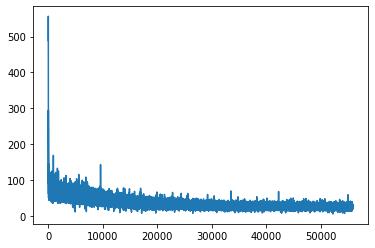

In [129]:
plt.plot(losses)

In [122]:
print(losses[10])

tensor(300.8222)
